In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use ('ggplot')
import numpy as np
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show(*args, **kw)>

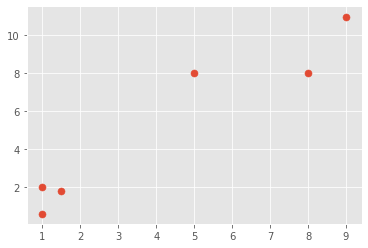

In [3]:
X = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
])

plt.scatter(X[:, 0],X[:, 1], s=50)
plt.show

In [29]:
clf = KMeans(n_clusters=6)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = [ "r.", "c.", "b.", "k.", "y."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = "x", s=100)
u7plt.show()

NameError: name 'KMeans' is not defined

Training and Testing Non Numeric Data

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use ('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing

In [2]:
df =pd.read_excel("titanic.xls")
df.shape

(1309, 14)

In [3]:
df.drop(["body", "name"], 1, inplace=True)
#df.convert_objects(conert_numeric=True)
df.fillna(0, inplace=True)

In [4]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            
            df[column]  = list(map(convert_to_int, df[column]))
    
    return df
    

In [5]:
df = handle_non_numerical_data(df)

In [6]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,0,29.0000,0,0,746,211.3375,73,2,1,335
1,1,1,1,0.9167,1,2,498,151.5500,131,2,6,285
2,1,0,0,2.0000,1,2,498,151.5500,131,2,0,285
3,1,0,1,30.0000,1,2,498,151.5500,131,2,0,285
4,1,0,0,25.0000,1,2,498,151.5500,131,2,0,285


In [6]:
df.shape

(1309, 12)

In [19]:
X = np.array(df.drop(["survived"],1) .astype(float))
X = preprocessing.scale(X)
y = np.array(df["survived"])


In [31]:
clf = KMeans(n_clusters = 4)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
correct = 0 

for i in range(len(X)):
    predict_me = np.array(X[i] .astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
     
print(correct/len(X))

0.5714285714285714


 KMeans Algorithm

In [1]:
 import matplotlib.pyplot as plt
from matplotlib import style
style.use ('ggplot')
import numpy as np

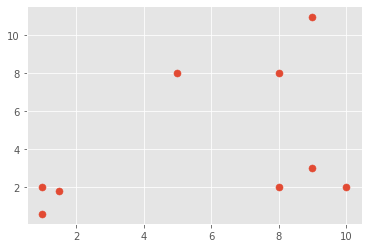

In [3]:
X = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11],
    [8, 2],
    [10, 2],
    [9, 3]
])

plt.scatter(X[:, 0],X[:, 1], s=50)
plt.show

colors = ["g", "r", "c", "b", "k", "y"]

In [3]:
class k_means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, data):
        
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
                
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                # euclidean distance
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                pass
            self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
            
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum( (current_centroid-original_centroid)/ original_centroid * 100.0) > self.tol:
                    optimized = False
            
            if optimized:
                break
            
    
    def predict(self, data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        # Euclidean Distance
        classification = distances.index(min(distances))
        
        return classification
    
        

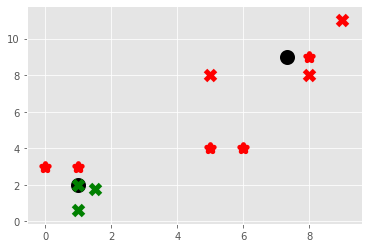

In [5]:
clf = k_means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker = "o", color = "k", s=100, linewidths=5)
    
for classification in clf.classifications:
    colori = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color = colori, s=100, linewidth=5)
        
unknowns = np.array([
    [1, 3],
    [8, 9],
    [0, 3],
    [5, 4],
    [6, 4]
])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker = "*", c = colors[classification], s =60, linewidths=5)

plt.show()

Mean Shift Clustering

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np


X = np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11],
    [8, 2],
    [10, 2],
    [9, 3]
])

plt.scatter(X[:, 0], X[:, 1],  s=100)
plt.show()

colors = 10*["g", "r", "c", "b", "k"]

<Figure size 640x480 with 1 Axes>

In [10]:
class Mean_Shift:
    def __init__(self, radius = None, radius_norm_step = 100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit (self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
        
        centroids = {}
        
        for i in range (len(data)):
            centroids[i] = data[i]
            
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                weights = [i for i in range(self.radius_norm_step)] [::-1]
                
                for featureset in data:
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                    to_add = (weights[weight_index]**2) *[featureset]
                    in_bandwidth += to_add
                    
                        
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            to_pop =[]
            
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i) - np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break
                        
            for i in to_pop:
                try:
                    unique.remove(i)
                except:
                    pass
                
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                    
            if optimized:
                break
                
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
        
        
        
    def predict (self, data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    


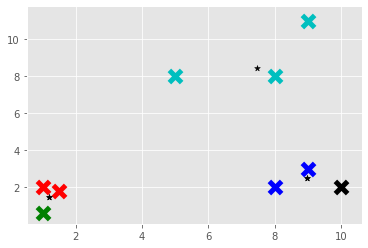

In [12]:
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color = color, s = 150, linewidth=5)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker='*')
    
plt.show()

In [ ]:
from sklearn.datasets.sample_generator import make_blobs
import random

X, y = make_blobs(n_samples=20, centers=centers, n_features=2)

centers = random.randrange(2, 5)